# **Customer Churn Model**
## This model predicts the likelihoood of a customer leaving a business based on historic data from the business

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Customer_Churn_Modelling.csv', sep = ',', index_col=0)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isnull().sum()     # No missing value

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- ## The **'Customerid'**, **'Surname'** olumn are irrelevant to our model.
- ##  For that reason, we will drop them

In [5]:
data.drop([ 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Exploratory Data Analysis

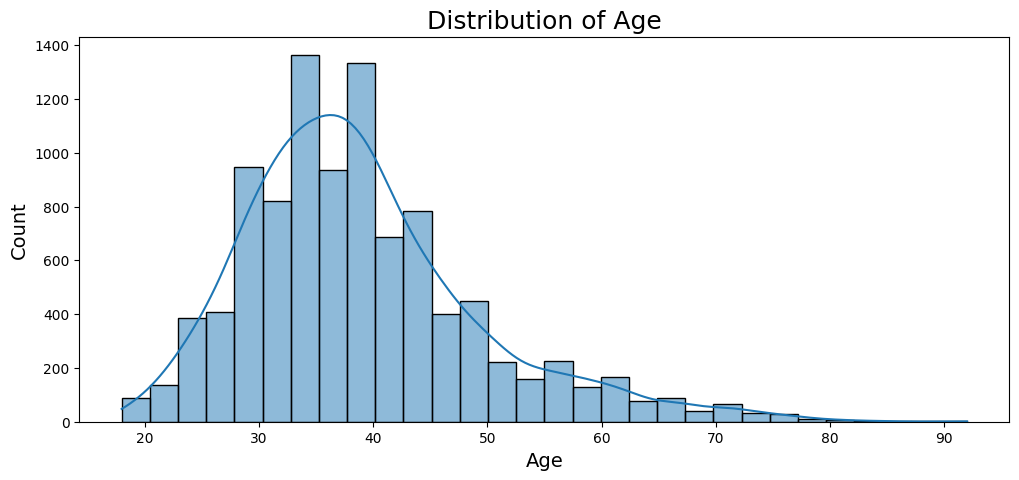

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age', fontsize = 18)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.show()

In [8]:
counts = data.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

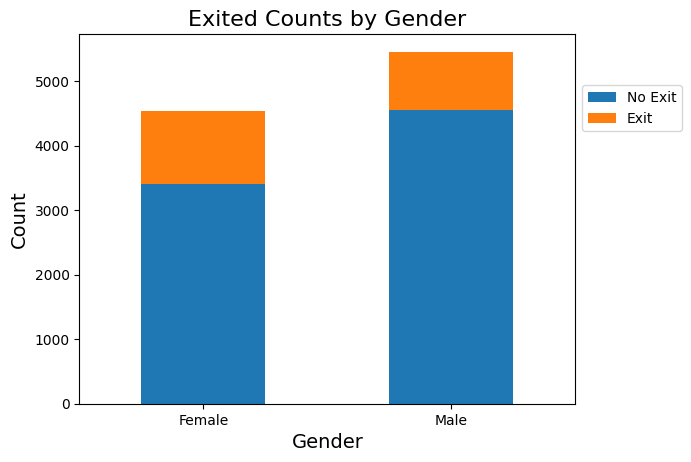

In [9]:
counts.plot(kind='bar', stacked=True)
plt.title('Exited Counts by Gender', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(labels=['No Exit', 'Exit'], loc='center left', bbox_to_anchor=(1, 0.8))
plt.xticks(rotation = 0)
plt.show()

In [10]:
counts2 = data.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

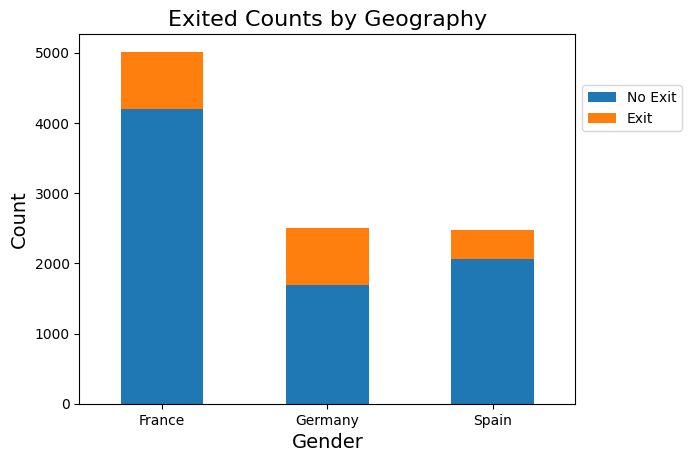

In [11]:
counts2.plot(kind='bar', stacked=True)
plt.title('Exited Counts by Geography', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(labels=['No Exit', 'Exit'], loc='center left', bbox_to_anchor=(1, 0.8))
plt.xticks(rotation = 0)
plt.show()

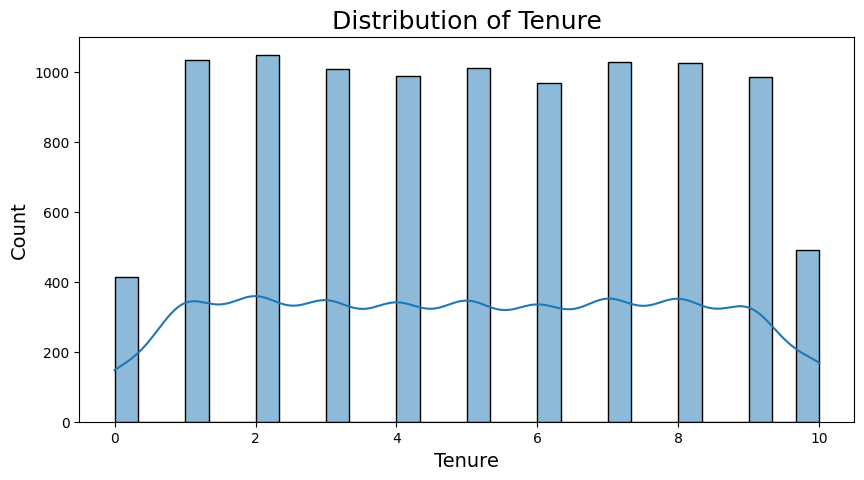

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure', fontsize = 18)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Tenure', fontsize = 14)
plt.show()

In [13]:
counts3 = data.groupby(['Exited', 'HasCrCard']).size().unstack(fill_value=0)

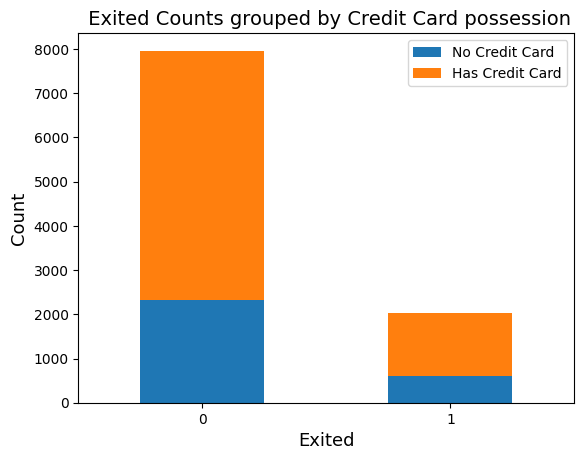

In [14]:
counts3.plot(kind='bar', stacked=True)
plt.title(' Exited Counts grouped by Credit Card possession', fontsize = 14)
plt.xlabel('Exited', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.legend(labels=['No Credit Card', 'Has Credit Card'])
plt.xticks(rotation = 0)
plt.show()

In [15]:
counts4 = data.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

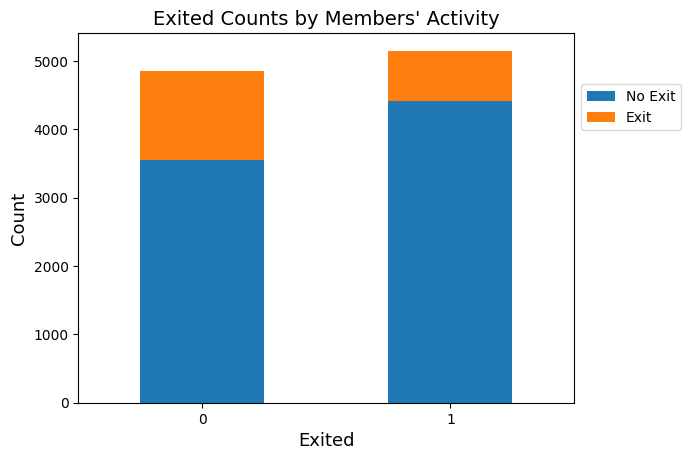

In [16]:
counts4.plot(kind='bar', stacked=True)
plt.title("Exited Counts by Members' Activity", fontsize = 14)
plt.xlabel('Exited', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.legend(labels=['No Exit', 'Exit'],loc='center left', bbox_to_anchor=(1, 0.8) )
plt.xticks(rotation = 0)
plt.show()

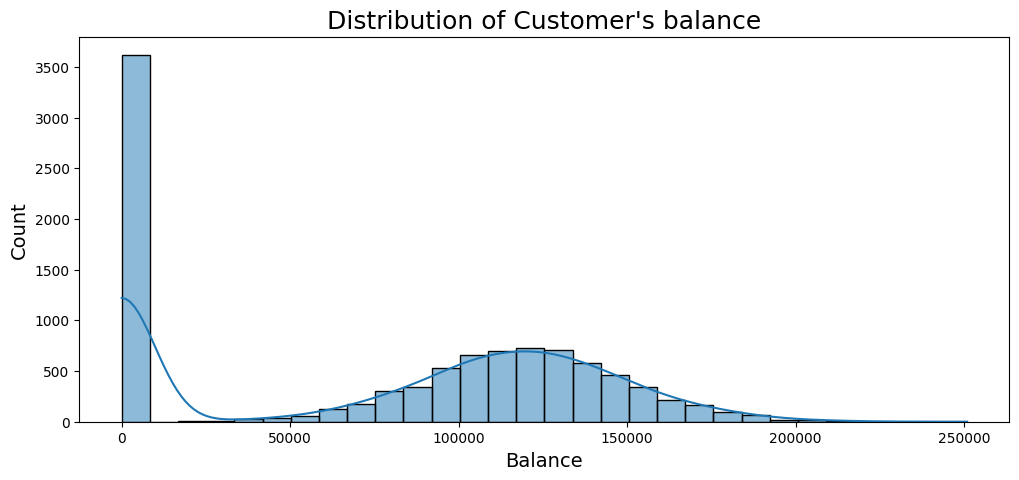

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Balance'], bins=30, kde=True)
plt.title("Distribution of Customer's balance", fontsize = 18)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Balance', fontsize = 14)
plt.show()

In [18]:
counts5 = data.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

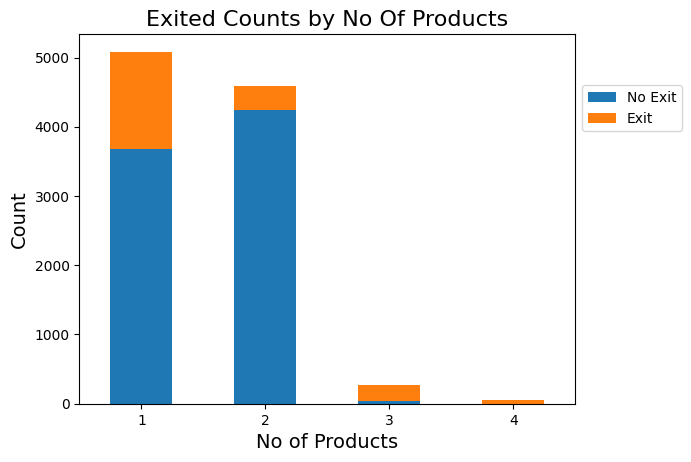

In [19]:
counts5.plot(kind='bar', stacked=True)
plt.title('Exited Counts by No Of Products', fontsize = 16)
plt.xlabel('No of Products', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(labels=['No Exit', 'Exit'], loc='center left', bbox_to_anchor=(1, 0.8))
plt.xticks(rotation = 0)
plt.show()

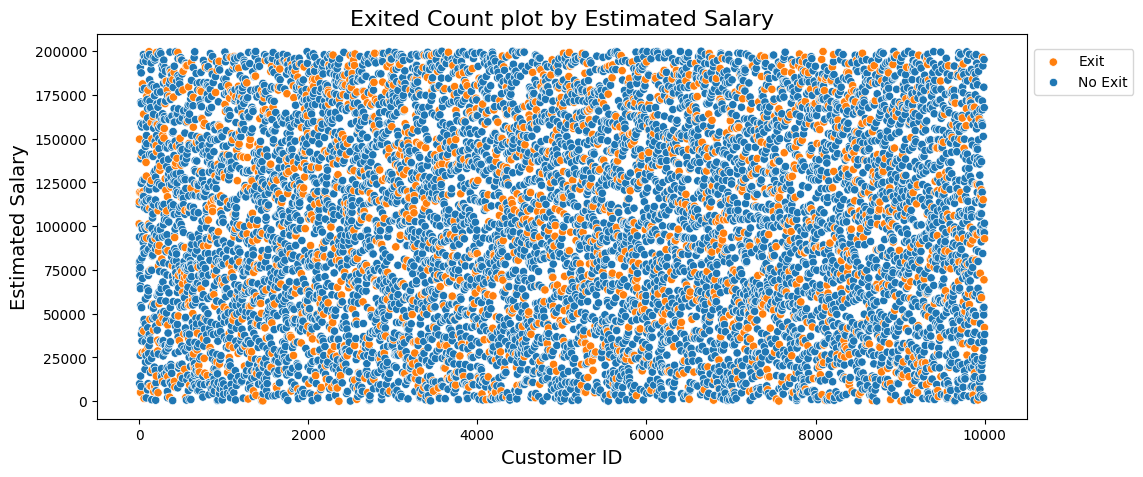

In [20]:
plt.figure(figsize = (12,5))
sns.scatterplot( x =data.index, y= 'EstimatedSalary', hue = 'Exited', data = data)
plt.legend(labels=['Exit', 'No Exit'], loc='center left', bbox_to_anchor=(1, 0.9))
plt.title('Exited Count plot by Estimated Salary', fontsize = 16)
plt.ylabel('Estimated Salary', fontsize = 14)
plt.xlabel('Customer ID', fontsize = 14)
plt.show()

In [21]:
data['Geography'].value_counts(), data['Gender'].value_counts()

(Geography
 France     5014
 Germany    2509
 Spain      2477
 Name: count, dtype: int64,
 Gender
 Male      5457
 Female    4543
 Name: count, dtype: int64)

# **Feature Engineering**

- ### From the 'EDA', we can see that each variable is important and independent of each other.
- ### Customers exiting is widely distributed among all the variables.
- ### For that reason, every variable column in the dataset (except for the 'Exited' column obviously) will be part of our feature

# **Building our model**

## Transforming our `categorical features` to `numeric features`

In [22]:
# List columns with categorical/object variables
categorical_column = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_column

['Geography', 'Gender']

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.select_dtypes(include = ['object', 'category']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [24]:
data['Geography'].value_counts(), data['Gender'].value_counts()

(Geography
 0    5014
 1    2509
 2    2477
 Name: count, dtype: int64,
 Gender
 1    5457
 0    4543
 Name: count, dtype: int64)

In [25]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Independent (X) and Dependent(y)  variables

In [26]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

### Splitting our Data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

- ### Our data has values that are far apart from eachother in different columns, so we will perform StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape[1:]        # No of variables in our Feature

(10,)

## **Choosing a model**: I will use `Artifical Neural Network` (Deep Learning)

In [30]:
# Building ANN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()
model.add(InputLayer(input_shape = X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,049 (70.50 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy')

In [34]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4447 - val_loss: 0.3664
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3721 - val_loss: 0.3464
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3549 - val_loss: 0.3398
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3436 - val_loss: 0.3400
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3328 - val_loss: 0.3429
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3356 - val_loss: 0.3449
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3216 - val_loss: 0.3423
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3330 - val_loss: 0.3414
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3302 - val_loss: 0.3401
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3205 - val_loss: 0.3375


In [35]:
y_pred = model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
y_pred

array([[0.04855671],
       [0.31102327],
       [0.19010769],
       ...,
       [0.41169035],
       [0.07191405],
       [0.1177334 ]], dtype=float32)

In [37]:
y_pred = (y_pred>0.5).astype(int)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1596
           1       0.75      0.49      0.59       404

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## Improving our model using XGBClassifier

In [39]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyper parameter grid
param_grid = {
    'max_depth': [3, 6, 10],                           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],                # Step size shrinkage 
    'n_estimators': [100, 500, 1000],                  # Number of boosting rounds
}

# Instantiate the model
model2 = XGBClassifier()

# Use GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)   
grid_search.fit(X_train, y_train)

# Get best hyperparameters / score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

# Use the best model to predict
XGB_model = grid_search.best_estimator_
y_pred = XGB_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Best Score: 0.8624995112670181


In [40]:
# To check accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1753
           1       0.48      0.78      0.59       247

    accuracy                           0.87      2000
   macro avg       0.72      0.83      0.76      2000
weighted avg       0.90      0.87      0.88      2000



### Example using random data

In [41]:
sample = [[600, 2, 1,41, 4, 125000,2,1,1,100000]]     # Inputing sample staticstics from the database
sample = scaler.fit_transform(sample)                                # Scaling the sample
churn = XGB_model.predict(sample)                              # Carrying out XGBClassifier (Most accurate Prediction)
if (churn == [0]):
    print("The Customer will not leave.")
else:
    print("The Customer will leave.")

The Customer will not leave.


In [42]:
#Saving our best model (XGBClassifier and StandardScaler)
import pickle

pickle.dump(scaler, open('scaler2.pkl', 'wb'))
pickle.dump(XGB_model, open('XGB_model.pkl', 'wb'))